In [230]:
pip install scipy.stats

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)
ERROR: No matching distribution found for scipy.stats


In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import scipy.stats as stats
# set the graphs to show in the jupyter notebook
%matplotlib inline
 
# set seabor graphs to a better style
sns.set(style="ticks")

1. Import claims_data.csv and cust_data.csv which is provided to you and 
combine the two datasets appropriately to create a 360-degree view of 
the data. Use the same for the subsequent questions.

In [233]:
#impoting the Customer data:- 
cust_data = pd.read_csv("C:/Users/dharmendra.sing1/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")

#importing the claim data:-
claims_data = pd.read_csv("C:/Users/dharmendra.sing1/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv")

#creating a new data set called df after merging the left join on cust data and claim data:- 
df=cust_data.merge(claims_data,left_on = "CUST_ID",right_on ='customer_id',how="left")
#printing the sample 10 rows of the df
df



,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1088,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1089,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1090,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   int64  
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1085 non-null   float64
 7   customer_id          1085 non-null   float64
 8   incident_cause       1085 non-null   object 
 9   claim_date           1085 non-null   object 
 10  claim_area           1085 non-null   object 
 11  police_report        1085 non-null   object 
 12  claim_type           1085 non-null   object 
 13  claim_amount         1020 non-null   object 
 14  total_policy_claims  1075 non-null   float64
 15  fraudulent           1085 non-null   o

In [235]:
print(claims_data.shape)
print(cust_data.shape)
print(df.shape)

(1100, 10)
(1085, 6)
(1092, 16)


2. Perform a data audit for the datatypes and find out if there are any 
mismatch within the current datatypes of the columns and their 
business significance

In [236]:
#converting datatype of date of birth and claim date from object to date
df["DateOfBirth"] = pd.to_datetime(df.DateOfBirth, format = "%d-%b-%y")
df.loc[(df.DateOfBirth.dt
             .year > 2020),"DateOfBirth"]=df[df.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

df["claim_date"] = pd.to_datetime(df["claim_date"], format="%m/%d/%Y")

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   int64         
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   object        
 5   Segment              1092 non-null   object        
 6   claim_id             1085 non-null   float64       
 7   customer_id          1085 non-null   float64       
 8   incident_cause       1085 non-null   object        
 9   claim_date           1085 non-null   datetime64[ns]
 10  claim_area           1085 non-null   object        
 11  police_report        1085 non-null   object        
 12  claim_type           1085 non-null   object        
 13  claim_amount         1020 non-nul

Convert the column claim_amount to numeric. Use the appropriate 
modules/attributes to remove the $ sign.

In [238]:
df["claim_amount"]=df.claim_amount.str.replace('$', '').astype(float)

df

C:\Users\DHARME~1.SIN\AppData\Local\Temp/ipykernel_15956/3447059348.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["claim_amount"]=df.claim_amount.str.replace('$', '').astype(float)


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No
1088,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No
1089,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No
1090,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No


4. Of all the injury claims, some of them have gone unreported with the 
police. Create an alert flag (1,0) for all such claims.

In [239]:
#claum type is injury only and police_repot is No then the flag is '1' else '0'

df['flag']=np.where(((df.claim_type =='Injury only') & (df.police_report == 'No')),'1','0' )

5. One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID 
should remain unique. 
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.

In [240]:
df.drop_duplicates(subset ="CUST_ID",inplace=True)
df

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252.0,19269962.0,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,79539873,Female,1981-03-15,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,0
1088,42364152,Female,1996-07-07,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1089,19888166,Male,1990-04-11,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,0
1090,11256802,Female,1964-10-22,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


6.Check for missing values and impute the missing values with an 
appropriate value. (mean for continuous and mode for categorical)

In [241]:
#calculating the total missing values:- 
a=df.isna().sum()
print("total count of the missing value is \n",a)

#fill the mising values of claim amount and total policy claim with there mean values.
df.claim_amount.fillna(value=df.claim_amount.mean(),inplace=True)
df.total_policy_claims.fillna(value=df.total_policy_claims.mean(),inplace=True)

#now we are dropping all the missing rows
df.dropna(axis=0,inplace=True)

#calculating the total missing values after the missing value treatment:- 
b=df.isna().sum()
print("total count of the missing value is \n",b)
print(df.info())



total count of the missing value is 
 CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
customer_id             7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
flag                    0
dtype: int64
total count of the missing value is 
 CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
flag                   0
dtype: int64
<class 'pandas.core.frame.DataF

7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria

Children < 18

Youth 18-30

Adult 30-60|

Senior > 60


In [242]:
#creating new column of age after extraction the dob fo the costumer from the today date:- 
df["age"]=int(pd.Timestamp.now().year)-df.DateOfBirth.dt.year.astype(int)
#categorizing the age with the help of bins:-

df["age_bins"] = pd.cut(x=df["age"],bins=[1, 17, 29,59, np.inf],labels=["Children","youth","adult","Senior"])

In [243]:
df.groupby(by = "age_bins").count().reset_index().iloc[:,0:2]

,age_bins,CUST_ID
0,Children,0
1,youth,208
2,adult,795
3,Senior,75


8. What is the average amount claimed by the customers from various 
segments?


In [244]:
df.pivot_table(index="Segment",values="claim_amount",aggfunc='mean')

,claim_amount
Segment,
Gold,12756.479697
Platinum,12369.304648
Silver,12269.434851


9. What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.

In [245]:
a1=pd.to_datetime("2018-10-01")

b1=a1 - pd.DateOffset(days = 20)
#c1=b1.strftime('%Y-%m-%d')
round(df[pd.to_datetime(df.claim_date) <b1].pivot_table(index="incident_cause",values="claim_amount",aggfunc='sum'),2)


,claim_amount
incident_cause,
Crime,724462.49
Driver error,3264285.98
Natural causes,1312705.99
Other causes,3725038.47
Other driver error,3318806.48


10. How many adults from TX, DE and AK claimed insurance for driver 
related issues and causes?

In [246]:
#method:-
df[
    ((df.age_bins=="adult") &
     ((df.incident_cause.str.contains("driver"))|(df.incident_cause.str.contains("Driver"))) &
     ((df.State=="tx") | (df.State=="DE") | (df.State=="AK") )) ].groupby(by = "State")["State"].count()

State
AK     8
DE    10
Name: State, dtype: int64

In [247]:
#method2:-
df[
    ((df.age_bins=="adult") &
     (df.incident_cause.str.lower().str.contains("driver")) &
     ((df.State=="tx") | (df.State=="DE") | (df.State=="AK") )) ].groupby(by = "State")["State"].count()

State
AK     8
DE    10
Name: State, dtype: int64

11. Draw a pie chart between the aggregated value of claim amount based 
on gender and segment. Represent the claim amount as a percentage on
the pie chart.

gender        Female        Male
Segment                         
Gold      2109763.49  2622890.48
Platinum  2369503.49  2095815.49
Silver    1898558.48  2346665.98


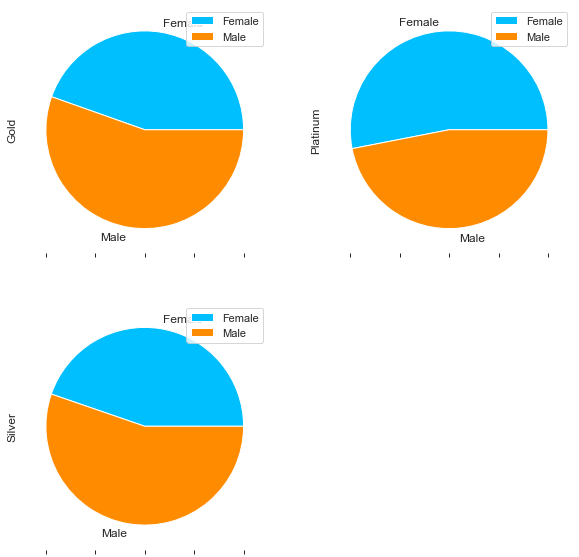

In [248]:
sg=round(df.pivot_table(index="Segment",values="claim_amount",columns='gender',aggfunc='sum'),2)
print(sg)
sg.T.plot(kind='pie', 
            
            colors=['deepskyblue', 'darkorange'],
          
            fontsize=12,
            subplots='true',
            layout=(2,2), #to get a grid
            figsize=(10,10))
plt.show()

12. Among males and females, which gender had claimed the most for any 
type of driver related issues? E.g. This metric can be compared using a 
bar chart

<AxesSubplot:xlabel='incident_cause'>

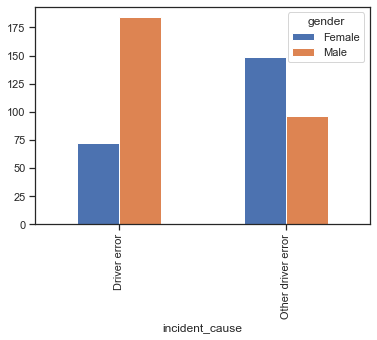

In [249]:
round(df[(((df.gender=="Female")|(df.gender=="Male")) &(df.incident_cause.str.lower().str.contains("driver")))].pivot_table(
    index="incident_cause",values="claim_amount",columns='gender',aggfunc='count'),2).plot(kind='bar')

13. Which age group had the maximum fraudulent policy claims? Visualize 
it on a bar chart.

age_bins  fraudulent
Children  Yes             0
youth     Yes            39
adult     Yes           187
Senior    Yes            21
Name: fraudulent, dtype: int64


<AxesSubplot:xlabel='age_bins,fraudulent'>

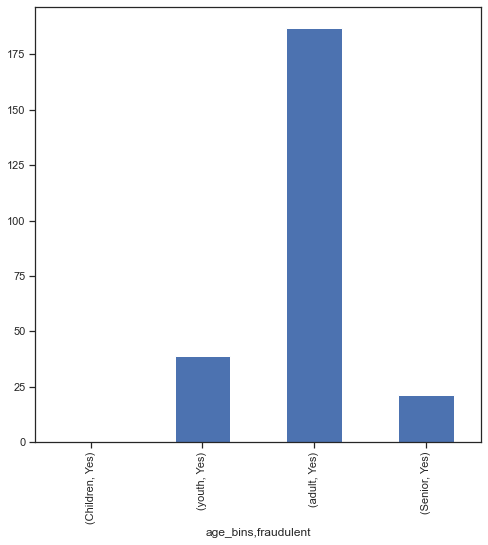

In [250]:
f=df[df.fraudulent=='Yes']
G2=f.groupby((["age_bins","fraudulent"]))["fraudulent"].count()
print(G2)
G2.plot(kind="bar",figsize=(8,8),width=0.5)

14. Visualize the monthly trend of the total amount that has been claimed 
by the customers. Ensure that on the “month” axis, the month is in a 
chronological order not alphabetical order. 

month_year
17-01    610302.495558
17-02    633523.997038
17-03    615513.997038
17-04    747944.498519
17-05    546647.995558
17-06    560112.498519
17-07    790743.994077
17-08    431553.997038
17-09    459250.489635
17-10    647201.995558
17-11    601124.997038
17-12    696701.498519
18-01    721709.494077
18-02    499582.997038
18-03    704579.995558
18-04    528126.998519
18-05    567563.492596
18-06    716220.492596
18-07    588290.992596
18-08    479649.498519
18-09    521397.495558
18-10    775453.492596
Name: claim_amount, dtype: float64


<AxesSubplot:xlabel='month_year'>

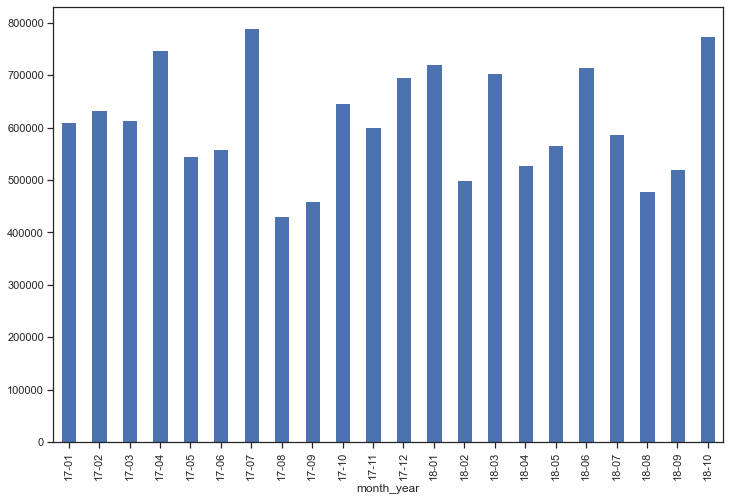

In [251]:
df['month_year']=pd.to_datetime(df.claim_date).dt.strftime('%y-%m')
g3=df.groupby((['month_year']))["claim_amount"].sum()
print(g3)
g3.plot(kind='bar',figsize=(12,8))

15. What is the average claim amount for gender and age categories and 
suitably represent the above using a facetted bar chart, one facet that 
represents fraudulent claims and the other for non-fraudulent claims.

Based on the conclusions from exploratory analysis as well as suitable 
statistical tests, answer the below questions. Please include a detailed 
write-up on the parameters taken into consideration, the Hypothesis 
testing steps, conclusion from the p-values and the business implications of 
the statements.

fraudulent                 No           Yes
age_bins gender                            
Children Female  0.000000e+00  0.000000e+00
         Male    0.000000e+00  0.000000e+00
youth    Female  1.066982e+06  1.935055e+05
         Male    1.063693e+06  1.403620e+05
adult    Female  3.556704e+06  1.152522e+06
         Male    3.801370e+06  1.546742e+06
Senior   Female  3.589830e+05  4.912800e+04
         Male    3.781710e+05  1.350330e+05


<AxesSubplot:xlabel='age_bins,gender'>

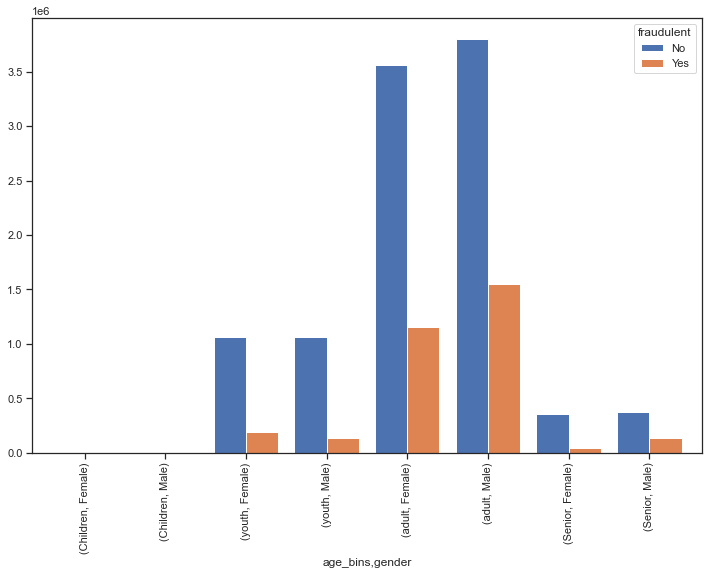

In [252]:
g15 = df.groupby((["fraudulent","age_bins","gender"]))["claim_amount"].sum()
g15= g15.unstack(level=0)
print(g15)
g15.plot(kind="bar",figsize=(12,8),width=0.8)


16. Is there any similarity in the amount claimed by males and females?

In [253]:
s1 = df.loc[ df.gender == 'Female', 'claim_amount']
s2 = df.loc[ df.gender == 'Male', 'claim_amount']
print( 'mean s1:', round(s1.mean(), 2), 
          '| mean s2:', round(s2.mean(), 2))
print( 'var s1:', round(s1.var(), 2), 
          '| var s2:', round(s2.var(), 2))



mean s1: 12102.14 | mean s2: 12822.82
var s1: 172812383.31 | var s2: 184287041.08


Ho: No variance in the spend of different gender Ha: Customers of different gender spend differently

CI: 95%, p: 0.05

Test: f-test

In [254]:
stats.f_oneway(s1, s2)

F_onewayResult(statistic=0.7829955562662301, pvalue=0.3764242430542767)

17. Is there any relationship between age category and segment?

Ho: No relationship | Both are independent Ha: Dependent | have relationship

CI: 99%, p: 0.01

Test: chisquare

In [255]:
obs = pd.crosstab( df.age_bins, df.Segment )
stats.chi2_contingency( obs )

(0.6654696397990999,
 0.9555179463691874,
 4,
 array([[ 71.58441558,  69.65491651,  66.7606679 ],
        [273.6038961 , 266.22912801, 255.16697588],
        [ 25.81168831,  25.11595547,  24.07235622]]))

18. The current year has shown a significant rise in claim amounts as 
compared to 2016-17 fiscal average which was $10,000.

In [263]:
a=round(df[((pd.to_datetime(df.claim_date).dt.strftime('%y%m').astype(int) >= 1704) &
    (pd.to_datetime(df.claim_date).dt.strftime('%y%m').astype(int)<=1803))].claim_amount.mean(),2)

b=round((a-10000)/10000*100,2)
print("current fiscal year average amount is :- ",a,'thi amount is ',b,'% more then the previous fiscal yeat average amount')


current fiscal year average amount is :-  12926.97 thi amount is  29.27 % more then the previous fiscal yeat average amount


In [264]:
stats.ttest_1samp( df.claim_amount, 10000 )

Ttest_1sampResult(statistic=6.068796577191384, pvalue=1.7827316562159517e-09)

19. Is there any difference between age groups and insurance claims?

In [265]:
g19 = df.groupby((["age_bins"]))["age_bins"].count()
g19

age_bins
Children      0
youth       208
adult       795
Senior       75
Name: age_bins, dtype: int64

In [268]:
A= df.loc[ df.age_bins == 'adult', 'total_policy_claims']
Y= df.loc[ df.age_bins == 'youth', 'total_policy_claims']
C= df.loc[ df.age_bins == 'Senior','total_policy_claims']

print( 'mean A:', round(A.mean(), 2), 
          '| mean Y:', round(Y.mean(), 2), 
              '| mean C:', round(C.mean(), 2))
print( 'var A:', round(A.var(), 2), 
          '| var Y:', round(Y.var(), 2), 
              '| var C:', round(C.var(), 2))
stats.f_oneway(A, Y, C)

mean A: 1.56 | mean Y: 1.66 | mean C: 1.55
var A: 1.19 | var Y: 1.68 | var C: 1.19


F_onewayResult(statistic=0.5970231489075319, pvalue=0.5506302073025293)

20. Is there any relationship between total number of policy claims and the 
claimed amount?

# corelation
Ho: No relationship Ha: Dependent or have relationship

CI: 95%, p-value: 0.05

Test: Pearson Cofficient

In [272]:
stats.pearsonr( df.total_policy_claims, df.claim_amount)

(-0.014291136186627359, 0.6392846937920396)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


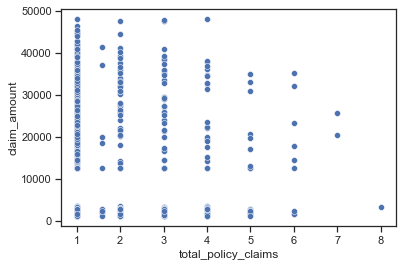

In [269]:
sns.scatterplot( df.total_policy_claims,df.claim_amount)
plt.show()